In [19]:
#Импорт библиотек
import pandas as pd

from scipy.stats import ks_2samp

from sklearn  import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8')

Для начала прочитаем данные.

In [2]:
data = pd.read_excel('./data/Тестовое задание.xlsx')
print(f'Data shape: {data.shape}')
display(data.head())

Data shape: (394, 2)


,PD для 2-х,Статус
0,0.0008,Хороший
1,0.0009,Хороший
2,0.0010,Хороший
3,0.0010,Хороший
4,0.0010,Хороший


Теперь необходимо закодировать целевой признак.

In [3]:
y_pred = data['PD для 2-х']
y_true = data['Статус'].apply(lambda x: 1 if x == 'Дефолт' else 0)
y_true.value_counts()

Статус
0    379
1     15
Name: count, dtype: int64

Рассчитываем коэфициент Джини и строим ROC-AUC.

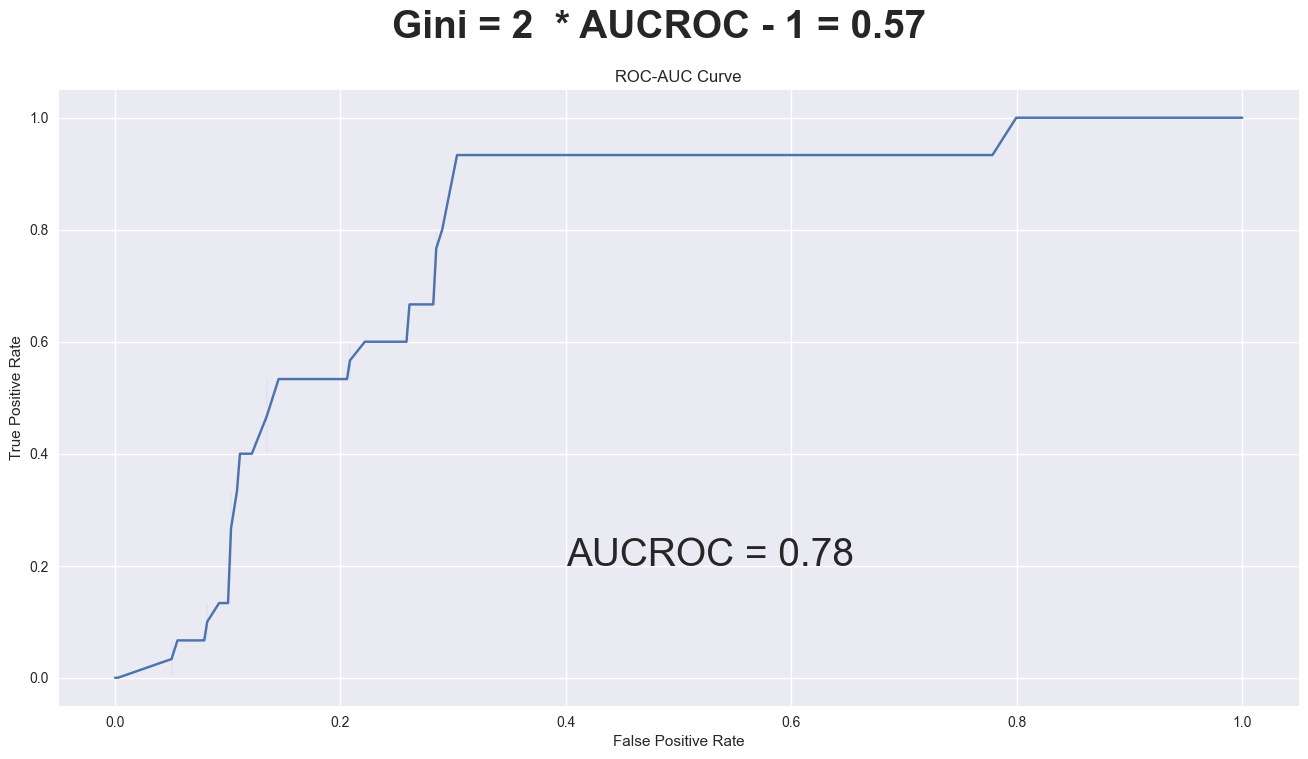

In [13]:
#Считаем нормализованный индекс Джини
roc_auc_score = metrics.roc_auc_score(y_true, y_pred)
n_gini = (2 * roc_auc_score) - 1

#Строим roc-auc кривую
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
fig.suptitle(f'Gini = 2  * AUCROC - 1 = {round(n_gini, 2)}', fontweight='bold', fontsize=28)
sns.lineplot(x=fpr, y=tpr, ax=ax)
ax.text(0.4,0.2,'AUCROC = {:0.2f}'.format(roc_auc_score),fontsize = 28)
ax.set_title('ROC-AUC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate');

Теперь проведем тест Колмогорова-Смирнова.

In [20]:
#Разделим наши данные по классам
positive = data[data['Статус'] == 'Дефолт']['PD для 2-х']
negative = data[data['Статус'] == 'Хороший']['PD для 2-х']

# Выполнение теста Колмогорова-Смирнова
ks_statistic, p_value = ks_2samp(positive, negative)
print(f"KS statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS statistic: 0.6299032541776605
P-value: 4.808172553627744e-06


Построим графики функций распределений для двух классов.

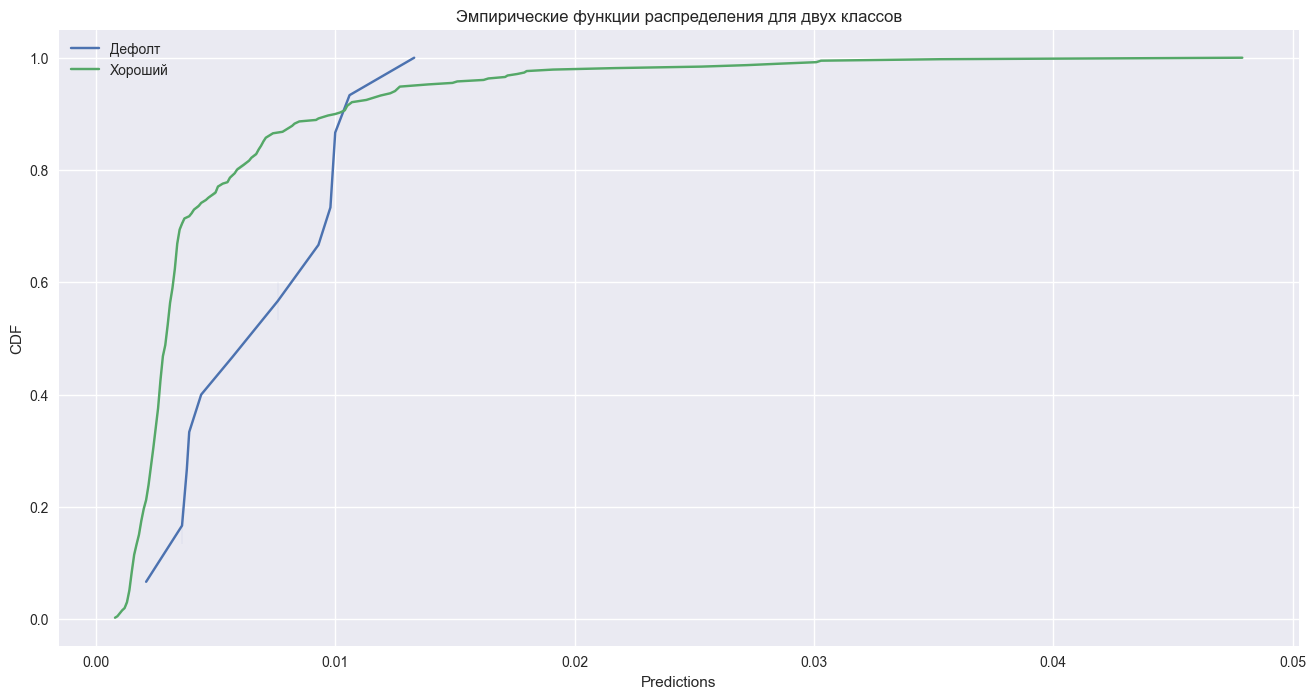

In [35]:
import numpy as np

# Сортировка данных для построения графиков
sorted_positive = positive.sort_values()
sorted_negative = negative.sort_values()

# Получение ЭФР для каждого набора предсказаний
cdf_positive = np.arange(1, len(sorted_positive)+1) / len(sorted_positive)
cdf_negative = np.arange(1, len(sorted_negative)+1) / len(sorted_negative)

# Построение линейных графиков
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.lineplot(x=sorted_positive, y=cdf_positive, ax=ax, label='Дефолт')
sns.lineplot(x=sorted_negative, y=cdf_negative, ax=ax, label='Хороший')
ax.set_title('Эмпирические функции распределения для двух классов')
ax.set_xlabel('Predictions')
ax.set_ylabel('CDF');